In [1]:
%config Application.log_level="DEBUG"
from easyimages import EasyImage, EasyImageList, bbox
import torch
import torchvision
from torchvision import transforms
import PIL
from easyimages  import *
from easyimages.easyimages import CTX

print(CTX)

jupyter


# EasyImage


####  image from file

EasyImageObject: img_00000002.jpg | labels: ['Person'] | downloaded: True | size: (205, 300) |


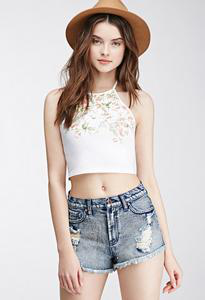

In [2]:
# in this context lazy means the object will store the metadata only and will not open the file just yet
image1 = EasyImage.from_file('./tests/test_data/image_folder/img_00000002.jpg',label=['Person'], lazy=True)
image1.show()

####  image from url


EasyImageObject: KDBRjyv.png | labels: [] | downloaded: True | size: (237, 212) |


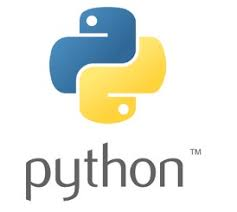

In [3]:
image2 = EasyImage.from_url('https://imgur.com/KDBRjyv.png')
image2.show()

####  image from torch-like

EasyImageObject: dbf7d19d.jpg | labels: [] | downloaded: True | size: (170, 250) |


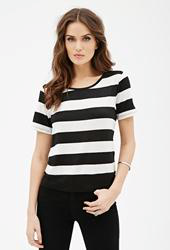

In [4]:
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

Trans = torchvision.transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=MEAN, std=STD),
        ])
torch_image = Trans(PIL.Image.open('./tests/test_data/image_folder/img_00000003.jpg'))


image3  = EasyImage.from_torch(torch_image, mean=MEAN, std=STD)
image3.show()

#### Draw label on image

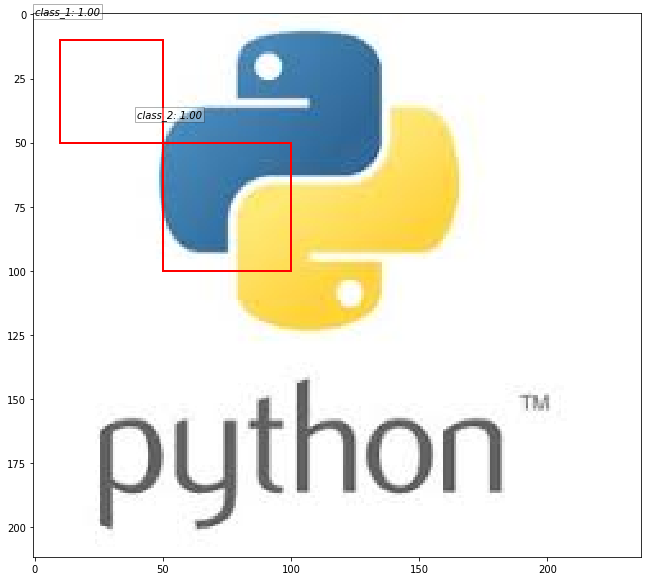

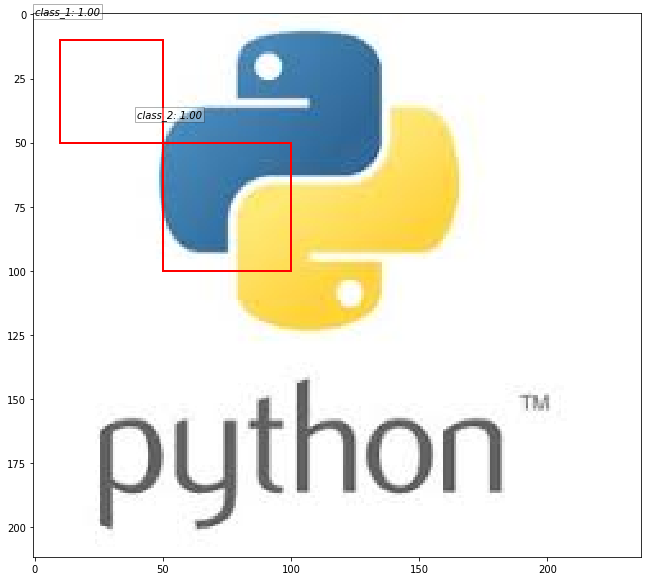

In [6]:
%matplotlib inline
image2.boxes = [bbox(10, 10, 50, 50, 1, 'class_1'), 
                bbox(50, 50, 100, 100, 1, 'class_2')]
image2.draw_boxes()

# EasyImageList()
Now it will get more exciting


In [7]:
easy_list = EasyImageList.from_multilevel_folder('./tests/test_data/hierarchy_images/')
easy_list

<ImageList with 6 EasyImages [filter OFF]>

In [8]:
easy_list.html(by_class=True)

Drawing Boston_Celtics_Graphic_Tee


Drawing Zig_Zag-Patterned_Shorts


In [9]:
easy_list.one_by_one(size=500)

interactive(children=(IntSlider(value=2, description='i', max=5), Output()), _dom_classes=('widget-interact',)…

In [12]:
easy_list.one_by_one(size=1000)

interactive(children=(IntSlider(value=2, description='i', max=5), Output()), _dom_classes=('widget-interact',)…

In [15]:
easy_list.save('./temp')

In [16]:
easy_list.html()

# easy_list[0].uri = ''

Drawing Boston_Celtics_Graphic_Tee


Drawing Zig_Zag-Patterned_Shorts


In [17]:
for im in easy_list:
    im.uri = im.uri.absolute()

In [18]:
im.uri

PosixPath('/home/i008/googledrive/Projects/easyimages/temp/img_00000001.jpg')